In [12]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os

In [2]:
#from requests import Request, Session
#from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
#import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2452aa28-8c8e-4418-896f-c290ead745b8',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [3]:
type(data)

dict

In [4]:
#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df


C:\Users\uSer\AppData\Local\Temp\ipykernel_11040\2804322923.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp']=pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10244,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.939686e+07,1.939686e+07,False,NaN,1,NaN,NaN,None,2023-06-09T05:38:00.000Z,26487.280501,1.192858e+10,-31.1045,0.148929,0.282442,-2.439839,-4.315979,-6.233518,28.141282,5.137700e+11,46.6416,5.562329e+11,None,2023-06-09T05:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-09 05:41:01.578775
1,1027,Ethereum,ETH,ethereum,6983,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202291e+08,1.202291e+08,True,NaN,2,NaN,NaN,None,2023-06-09T05:38:00.000Z,1837.725634,4.632145e+09,-35.9497,0.035089,-0.031423,-2.986945,-0.381904,-1.128129,24.879872,2.209481e+11,20.0522,2.209481e+11,None,2023-06-09T05:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-09 05:41:01.578775
2,825,Tether,USDT,tether,55236,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.332160e+10,8.608653e+10,True,NaN,3,NaN,NaN,None,2023-06-09T05:38:00.000Z,1.000241,1.820083e+10,-29.7213,0.020608,0.029679,0.014198,-0.005462,-0.025755,-0.369393,8.334172e+10,7.5652,8.610732e+10,None,2023-06-09T05:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-09 05:41:01.578775
3,1839,BNB,BNB,bnb,1452,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558550e+08,1.558550e+08,False,NaN,4,NaN,NaN,None,2023-06-09T05:38:00.000Z,260.391759,5.473260e+08,-43.8776,0.129256,-0.052662,-15.490747,-16.861385,-16.778154,-6.895241,4.058336e+10,3.6843,4.058336e+10,None,2023-06-09T05:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-09 05:41:01.578775
4,3408,USD Coin,USDC,usd-coin,12894,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.843895e+10,2.843895e+10,False,NaN,5,NaN,NaN,None,2023-06-09T05:38:00.000Z,1.000081,2.760886e+09,-28.4944,0.016236,0.023489,0.025745,0.024382,0.026901,5.327143,2.844126e+10,2.5820,2.844126e+10,None,2023-06-09T05:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-09 05:41:01.578775
5,52,XRP,XRP,xrp,961,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,None,2023-06-09T05:38:00.000Z,0.525321,8.959933e+08,-44.3576,0.088957,0.756728,1.174847,21.903776,4.317862,41.773029,2.730989e+10,2.4790,5.253213e+10,None,2023-06-09T05:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-09 05:41:01.578775
6,2010,Cardano,ADA,cardano,831,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.490407e+10,3.585859e+10,False,NaN,7,NaN,NaN,None,2023-06-09T05:38:00.000Z,0.318603,2.357588e+08,-40.8834,-0.151397,-1.604518,-14.643940,-12.633107,-17.681528,-0.073007,1.112053e+10,1.0095,1.433712e+10,None,2023-06-09T05:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-09 05:41:01.578775
7,74,Dogecoin,DOGE,dogecoin,723,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.396908e+11,1.396908e+11,True,NaN,8,NaN,NaN,None,2023-06-09T05:38:00.000Z,0.067826,1.645199e+08,-37.8034,0.050550,-0.220756,-5.943140,-7.450122,-18.346916,1.795006,9.474735e+09,0.8601,9.474735e+09,None,2023-06-09T05:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-09 05:41:01.578775
8,5426,Solana,SOL,solana,469,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",Na

In [13]:
def api_runner():
    global df 
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
    'start':'1',
    'limit':'20',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '2452aa28-8c8e-4418-896f-c290ead745b8',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    df2 = pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
    df

    if not os.path.isfile(r'D:\Porfolio Project\API project\API.csv'):
        df.to_csv(r'D:\Porfolio Project\API project\API.csv',header = 'column_names')
    else:
        df.to_csv(r'D:\Porfolio Project\API project\API.csv',mode = 'a',header=False)
                          



In [14]:
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed succesfully')
    sleep(60) #sleep for 1 min
exit()

C:\Users\uSer\AppData\Local\Temp\ipykernel_11040\4275731100.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp']=pd.to_datetime('now')


API Runner completed succesfully


C:\Users\uSer\AppData\Local\Temp\ipykernel_11040\4275731100.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp']=pd.to_datetime('now')


API Runner completed succesfully


KeyboardInterrupt: 

In [16]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [19]:
df.head(5)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10244,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19396856.00000,19396856.00000,False,NaN,1,NaN,NaN,None,2023-06-09T05:38:00.000Z,26487.28050,11928576733.65277,-31.10450,0.14893,0.28244,-2.43984,-4.31598,-6.23352,28.14128,513769965704.45300,46.64160,556232890515.53003,None,2023-06-09T05:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-09 05:41:01.578775
1,1027,Ethereum,ETH,ethereum,6983,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120229122.25872,120229122.25872,True,NaN,2,NaN,NaN,None,2023-06-09T05:38:00.000Z,1837.72563,4632145433.18966,-35.94970,0.03509,-0.03142,-2.98695,-0.38190,-1.12813,24.87987,220948139948.04318,20.05220,220948139948.04001,None,2023-06-09T05:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-09 05:41:01.578775
2,825,Tether,USDT,tether,55236,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83321599071.57214,86086529362.37724,True,NaN,3,NaN,NaN,None,2023-06-09T05:38:00.000Z,1.00024,18200833904.81091,-29.72130,0.02061,0.02968,0.01420,-0.00546,-0.02575,-0.36939,83341719428.24124,7.56520,86107317389.67000,None,2023-06-09T05:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-09 05:41:01.578775
3,1839,BNB,BNB,bnb,1452,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155855024.65283,155855024.65283,False,NaN,4,NaN,NaN,None,2023-06-09T05:38:00.000Z,260.39176,547326039.28571,-43.87760,0.12926,-0.05266,-15.49075,-16.86139,-16.77815,-6.89524,40583363965.09360,3.68430,40583363965.09000,None,2023-06-09T05:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-09 05:41:01.578775
4,3408,USD Coin,USDC,usd-coin,12894,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28438948618.46664,28438948618.46664,False,NaN,5,NaN,NaN,None,2023-06-09T05:38:00.000Z,1.00008,2760885686.53971,-28.49440,0.01624,0.02349,0.02574,0.02438,0.02690,5.32714,28441258574.54437,2.58200,28441258574.54000,None,2023-06-09T05:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-09 05:41:01.578775


In [21]:
#Looking at coin trends over time

df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.13081,0.29432,-2.52079,-4.31586,-6.25596,28.00750
Ethereum,0.05233,-0.00783,-3.02845,-0.36877,-1.13427,24.88246
Tether,0.00430,0.01461,-0.00844,-0.01659,-0.02793,-0.38437
BNB,0.11856,-0.02924,-15.51126,-16.86086,-16.79305,-6.92902
USD Coin,-0.00595,0.00819,0.00246,0.00995,0.02412,5.31578
XRP,0.13783,0.80483,1.20082,21.88993,4.33616,41.77885
Cardano,-0.20224,-1.61043,-14.70941,-12.67319,-17.75187,-0.13487
Dogecoin,0.04647,-0.16921,-5.95780,-7.44056,-18.34627,1.77171
Solana,0.02448,0.72624,-11.25681,-9.71832,-7.42305,2.68130


In [22]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h      0.13081
                 quote.USD.percent_change_24h     0.29432
                 quote.USD.percent_change_7d     -2.52079
                 quote.USD.percent_change_30d    -4.31586
                 quote.USD.percent_change_60d    -6.25596
                 quote.USD.percent_change_90d    28.00750
Ethereum         quote.USD.percent_change_1h      0.05233
                 quote.USD.percent_change_24h    -0.00783
                 quote.USD.percent_change_7d     -3.02845
                 quote.USD.percent_change_30d    -0.36877
                 quote.USD.percent_change_60d    -1.13427
                 quote.USD.percent_change_90d    24.88246
Tether           quote.USD.percent_change_1h      0.00430
                 quote.USD.percent_change_24h     0.01461
                 quote.USD.percent_change_7d     -0.00844
                 quote.USD.percent_change_30d    -0.01659
                 quote.USD

In [23]:
type(df4)

pandas.core.series.Series

In [25]:
df5 = df4.to_frame(name='values')
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h    0.13081
                quote.USD.percent_change_24h   0.29432
                quote.USD.percent_change_7d   -2.52079
                quote.USD.percent_change_30d  -4.31586
                quote.USD.percent_change_60d  -6.25596
                quote.USD.percent_change_90d  28.00750
Ethereum        quote.USD.percent_change_1h    0.05233
                quote.USD.percent_change_24h  -0.00783
                quote.USD.percent_change_7d   -3.02845
                quote.USD.percent_change_30d  -0.36877
                quote.USD.percent_change_60d  -1.13427
                quote.USD.percent_change_90d  24.88246
Tether          quote.USD.percent_change_1h    0.00430
                quote.USD.percent_change_24h   0.01461
                quote.USD.percent_change_7d   -0.00844
                quote.USD.percent_change_30d  -0.01659
                quote.USD.percent_change_60d  -0.02793
                quote.USD.percent_change_90d  -0.38437
BNB             quote.USD.percent_change_1h    0.11856
                quote.USD.percent_change_24h  -0.02924
                quote.USD.percent_change_7d  -15.51126
                quote.USD.percent_change_30d -16.86086
                quote.USD.percent_change_60d -16.79305
                quote.USD.percent_change_90d  -6.92902
USD Coin        quote.USD.percent_change_1h   -0.00595
                quote.USD.percent_change_24h   0.00819
                quote.USD.percent_change_7d    0.00246
                quote.USD.percent_change_30d   0.00995
                quote.USD.percent_change_60d   0.02412
                quote.USD.percent_change_90d   5.31578
XRP             quote.USD.percent_change_1h    0.13783
                quote.USD.percent_change_24h   0.80483
                quote.USD.percent_change_7d    1.20082
                quote.USD.percent_change_30d  21.88993
                quote.USD.percent_change_60d   4.33616
                quote.USD.percent_change_90d  41.77885
Cardano         quote.USD.percent_change_1h   -0.20224
                quote.USD.percent_change_24h  -1.61043
                quote.USD.percent_change_7d  -14.70941
                quote.USD.percent_change_30d -12.67319
                quote.USD.percent_change_60d -17.75187
                quote.USD.percent_change_90d  -0.13487
Dogecoin        quote.USD.percent_change_1h    0.04647
                quote.USD.percent_change_24h  -0.16921
                quote.USD.percent_change_7d   -5.95780
                quote.USD.percent_change_30d  -7.44056
                quote.USD.percent_change_60d -18.34627
                quote.USD.percent_change_90d   1.77171
Solana          quote.USD.percent_change_1h    0.02448
                quote.USD.percent_change_24h   0.72624
                quote.USD.percent_change_7d  -11.25681
                quote.USD.percent_change_30d  -9.71832
                quote.USD.percent_change_60d  -7.42305
                quote.USD.percent_change_90d   2.68130
Polygon         quote.USD.percent_change_1h   -0.17831
                quote.USD.percent_change_24h   2.27890
                quote.USD.percent_change_7d  -13.68713
                quote.USD.percent_change_30d -10.80018
                quote.USD.percent_change_60d -28.35775
                quote.USD.percent_change_90d -26.03591
TRON            quote.USD.percent_change_1h    0.09912
                quote.USD.percent_change_24h   0.90235
                quote.USD.percent_change_7d    1.15620
                quote.USD.percent_change_30d  11.71517
                quote.USD.percent_change_60d  16.11755
                quote.USD.percent_change_90d  35.13476
Litecoin        quote.USD.percent_change_1h    0.12709
                quote.USD.percent_change_24h  -0.69057
                quote.USD.percent_change_7d   -7.92178
                quote.USD.percent_change_30d  10.03304
                quote.USD.percent_change_60d  -3.01565
                quote.USD.percent

In [26]:
df5.count()

values    120
dtype: int64

In [28]:
#As it is structured differently we need to set an index

index = pd.Index(range(120))

#df6 = df5.set_index(index)
df6 = df5.reset_index()
df6



,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.13081
1,Bitcoin,quote.USD.percent_change_24h,0.29432
2,Bitcoin,quote.USD.percent_change_7d,-2.52079
3,Bitcoin,quote.USD.percent_change_30d,-4.31586
4,Bitcoin,quote.USD.percent_change_60d,-6.25596
5,Bitcoin,quote.USD.percent_change_90d,28.00750
6,Ethereum,quote.USD.percent_change_1h,0.05233
7,Ethereum,quote.USD.percent_change_24h,-0.00783
8,Ethereum,quote.USD.percent_change_7d,-3.02845
9,Ethereum,quote.USD.percent_change_30d,-0.36877


In [29]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.13081
1,Bitcoin,quote.USD.percent_change_24h,0.29432
2,Bitcoin,quote.USD.percent_change_7d,-2.52079
3,Bitcoin,quote.USD.percent_change_30d,-4.31586
4,Bitcoin,quote.USD.percent_change_60d,-6.25596
5,Bitcoin,quote.USD.percent_change_90d,28.00750
6,Ethereum,quote.USD.percent_change_1h,0.05233
7,Ethereum,quote.USD.percent_change_24h,-0.00783
8,Ethereum,quote.USD.percent_change_7d,-3.02845
9,Ethereum,quote.USD.percent_change_30d,-0.36877


In [33]:
 df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.13081
1,Bitcoin,24h,0.29432
2,Bitcoin,7d,-2.52079
3,Bitcoin,30d,-4.31586
4,Bitcoin,60d,-6.25596
5,Bitcoin,90d,28.00750
6,Ethereum,1h,0.05233
7,Ethereum,24h,-0.00783
8,Ethereum,7d,-3.02845
9,Ethereum,30d,-0.36877


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

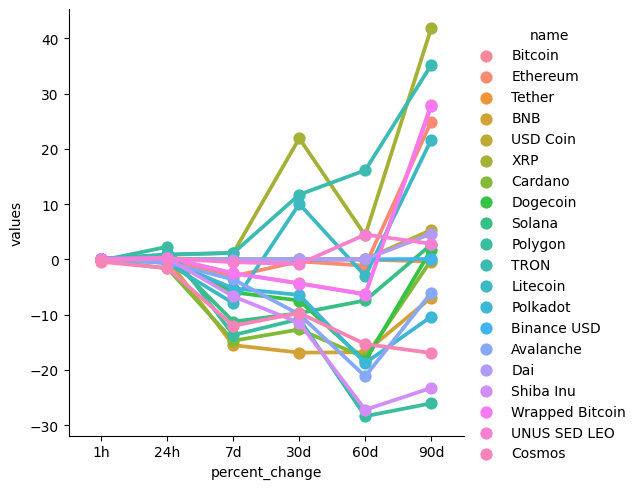

In [35]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point')


In [36]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,26487.28050,2023-06-09 05:41:01.578775
0,Bitcoin,26489.47638,2023-06-09 05:42:30.866824
0,Bitcoin,26487.98717,2023-06-09 05:43:32.015856


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

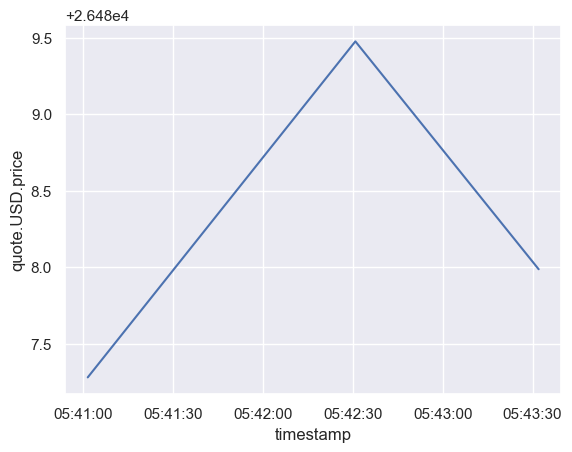

In [37]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

s